<a href="https://colab.research.google.com/github/aryan802/bike-orders-data-kaggle/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import pickle
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/FDS-Project/data/orders_bikes_cleaned.csv')

In [ ]:
df.head()

,order.id,order.line,order.date,customer.id,product.id,quantity,bike.id,model,category1,category2,frame,price,total_sales,year,month
0,1,1,2011-01-07,2,48,1.0,48,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,6070.0,6070.0,2011,2011-01
1,1,2,2011-01-07,2,52,1.0,52,Trigger Carbon 2,Mountain,Over Mountain,Carbon,5970.0,5970.0,2011,2011-01
2,2,1,2011-01-10,10,76,1.0,76,Beast of the East 1,Mountain,Trail,Aluminum,2770.0,2770.0,2011,2011-01
3,2,2,2011-01-10,10,52,1.0,52,Trigger Carbon 2,Mountain,Over Mountain,Carbon,5970.0,5970.0,2011,2011-01
4,3,1,2011-01-10,6,2,1.0,2,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,7890.0,7890.0,2011,2011-01


In [ ]:
le_category1 = LabelEncoder()
le_category2 = LabelEncoder()
le_frame = LabelEncoder()

In [ ]:
df['category1_encoded'] = le_category1.fit_transform(df['category1'])
df['category2_encoded'] = le_category2.fit_transform(df['category2'])
df['frame_encoded'] = le_frame.fit_transform(df['frame'])

In [ ]:
features = ['category1_encoded','category2_encoded', 'frame_encoded']
X = df[features]
y = df['price']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test,Y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 2561987.23
R^2 Score: 0.45


In [ ]:
# Encode categorical variables
le_category1 = LabelEncoder()
le_frame = LabelEncoder()
df['category1_encoded'] = le_category1.fit_transform(df['category1'])
df['frame_encoded'] = le_frame.fit_transform(df['frame'])

# Features and target
X = df[['price', 'frame_encoded']].values
y = df['category1_encoded'].values

# Train logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X, y)

# Predictions
y_pred = log_model.predict(X)

In [ ]:
x_min, x_max = X[:, 0].min() - 1000, X[:, 0].max() + 1000
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

In [ ]:
probs = log_model.predict_proba(grid)[:, 1].reshape(xx.shape)

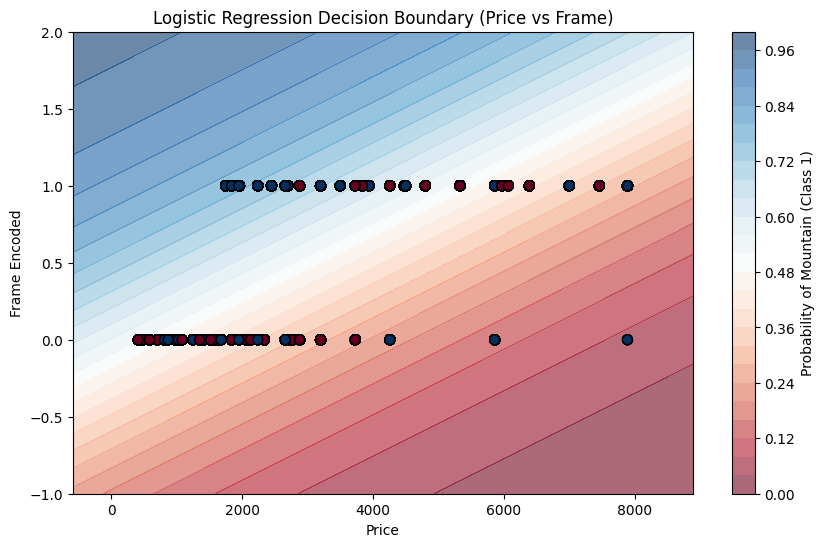

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, probs, levels=25, cmap="RdBu", alpha=0.6)
plt.colorbar(label='Probability of Mountain (Class 1)')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='k', s=50)
plt.xlabel('Price')
plt.ylabel('Frame Encoded')
plt.title('Logistic Regression Decision Boundary (Price vs Frame)')
plt.show()

**SVM Model**

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train LinearSVC
svm_model = LinearSVC(max_iter=10000)  # increase max_iter if needed
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6056428342417441


In [ ]:
y_pred = svm_model.predict(X_test)
mse = mean_squared_error(Y_test,y_pred)
r2= r2_score(Y_test,y_pred)

In [ ]:
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 15809263.54
R^2 Score: -2.42


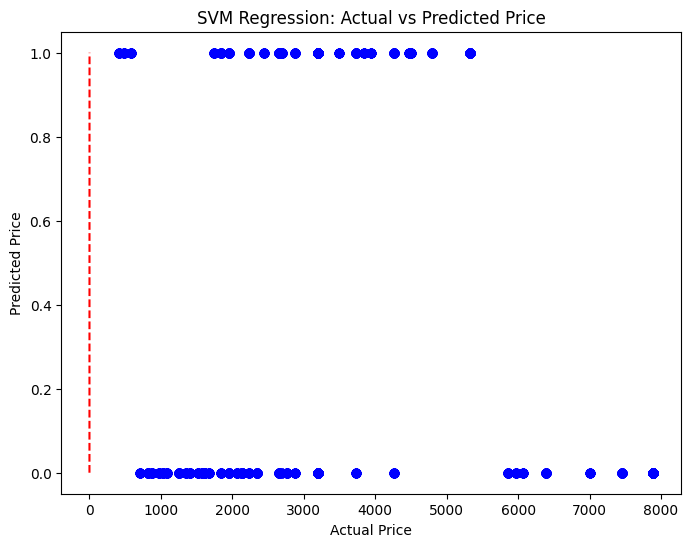

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('SVM Regression: Actual vs Predicted Price')
plt.show()

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

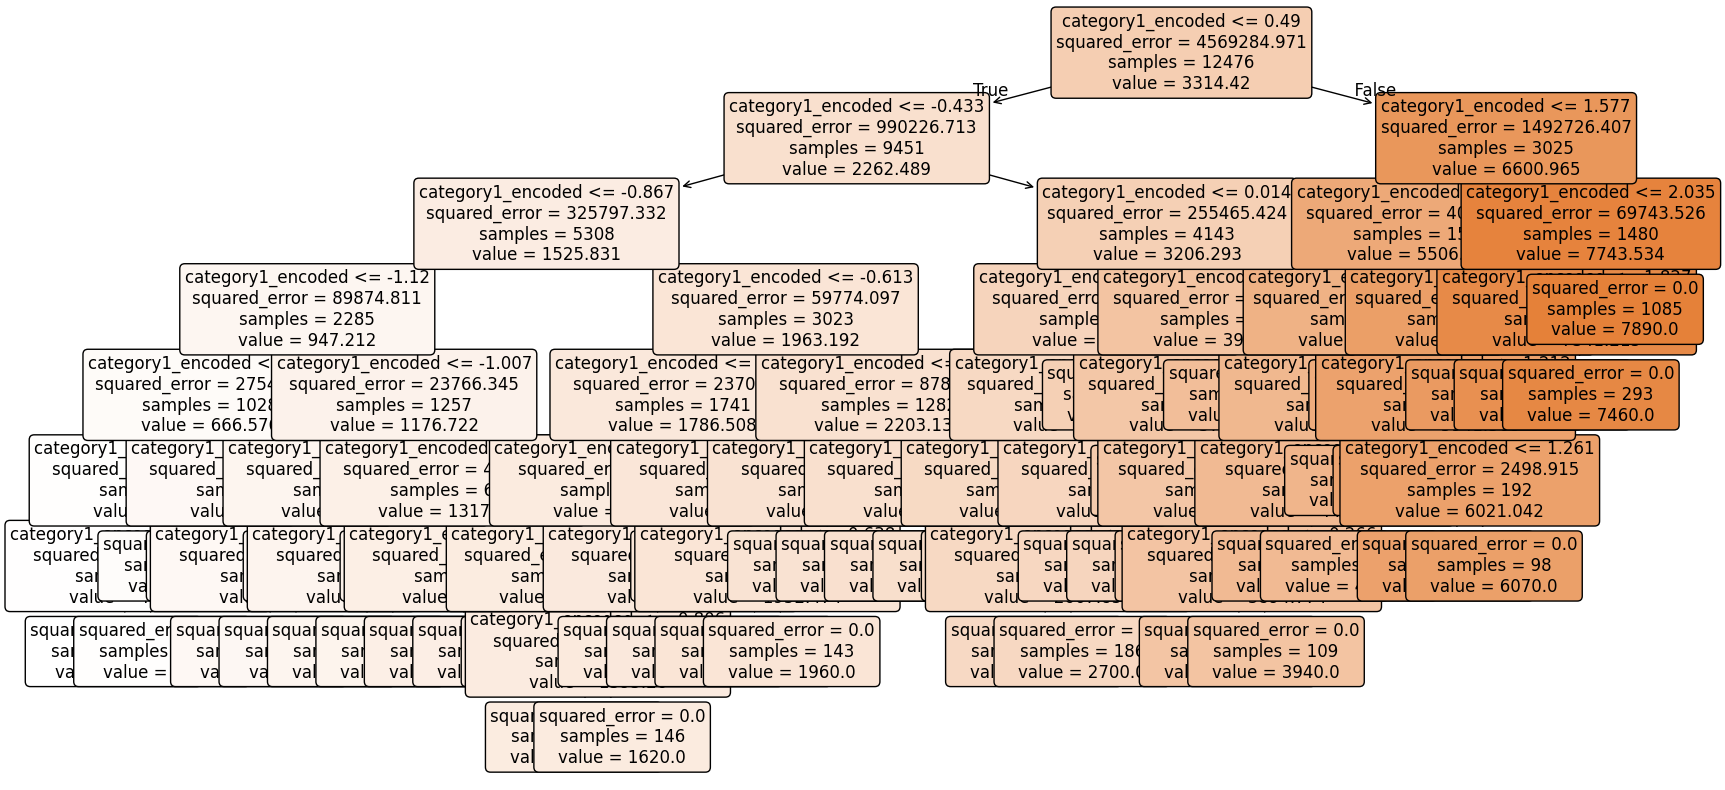

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=features, filled=True, rounded=True, fontsize=12)
plt.show()

 **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.00
R^2 Score: 1.00


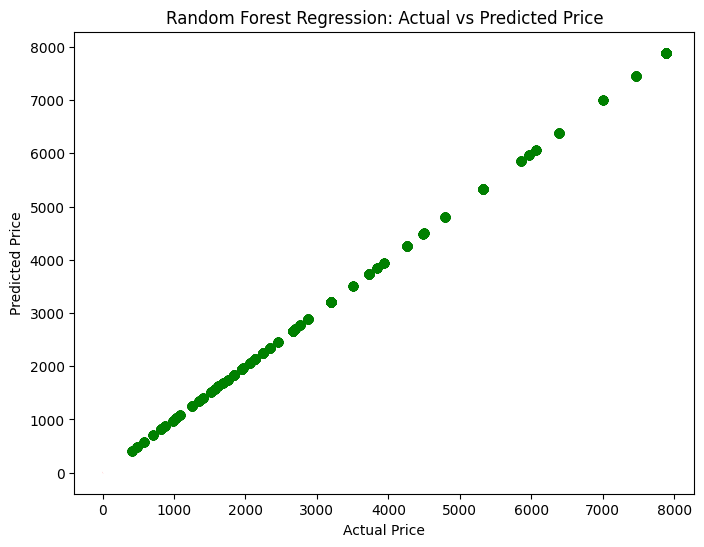

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression: Actual vs Predicted Price')
plt.show()

**Adaboost Classification Model**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
df = pd.read_csv('/content/drive/My Drive/FDS-Project/data/orders_bikes_cleaned.csv')

In [ ]:
ada_model = AdaBoostRegressor(n_estimators= 100, random_state = 42)
ada_model.fit(X_train, Y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [ ]:
y_pred = ada_model.predict(X_test)

In [ ]:
mse = mean_squared_error(Y_test,y_pred)

In [ ]:
r2 = r2_score(Y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 47608.83
R^2 Score: 0.99


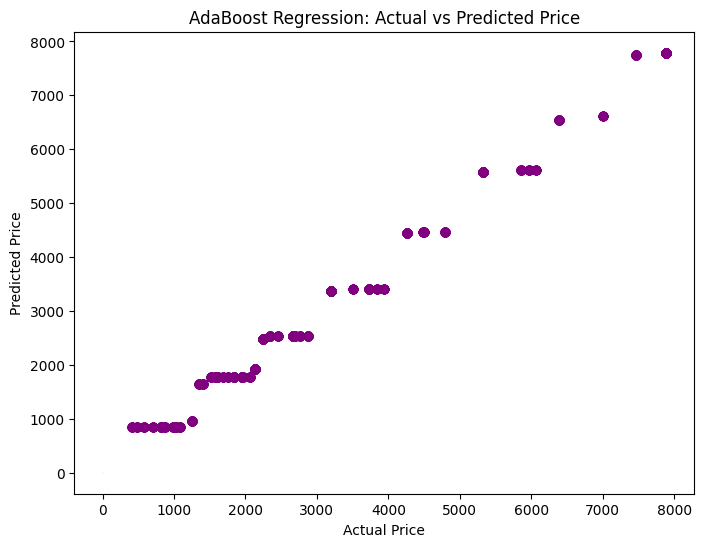

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Y_test, y_pred, color='purple')
plt.plot([y.min(), y.max()],[y.min(), y.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('AdaBoost Regression: Actual vs Predicted Price')
plt.show()

**Artificial Neural Network**

**evaluation of metrics**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
le_category1 = LabelEncoder()
df['category1_encoded'] = le_category1.fit_transform(df['category1'])

In [ ]:
le_frame = LabelEncoder()
df['frame_encoded'] = le_frame.fit_transform(df['frame'])
X = df[['price', 'frame_encoded']]
y = df['category1_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=2000)  # increase max_iter too
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_probs = model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [ ]:
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision (weighted): {precision:.3f}")
print(f"Recall (weighted): {recall:.3f}")
print(f"F1 Score (weighted): {f1:.3f}")

Accuracy: 0.606
Precision (weighted): 0.605
Recall (weighted): 0.606
F1 Score (weighted): 0.602


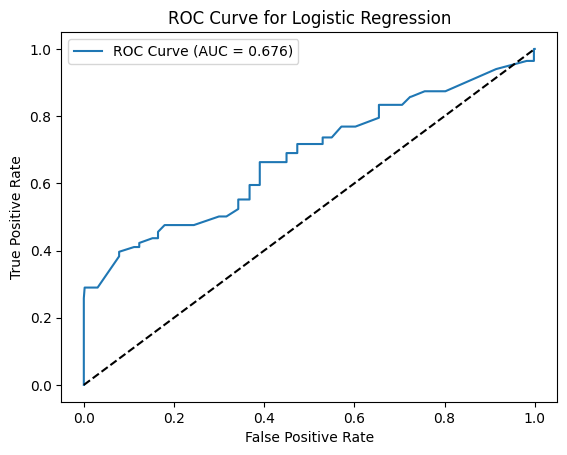

In [ ]:
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd


In [ ]:
testing_models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB()
}

In [ ]:
comparison_results= []

In [ ]:
for name, model in testing_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    comparison_results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

In [ ]:
results_df = pd.DataFrame(comparison_results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.605643   0.605281  0.605643  0.601511
1        Decision Tree  0.844181   0.848810  0.844181  0.843078
2        Random Forest  0.843219   0.847668  0.843219  0.842136
3             AdaBoost  0.626483   0.666877  0.626483  0.611101
4                  SVM  0.588330   0.588088  0.588330  0.588184
5          Naive Bayes  0.639628   0.643195  0.639628  0.632760


In [ ]:
import pickle

# Path to save models
model_path = '/content/drive/My Drive/FDS-Project/models/'

# Save logistic regression model
with open(model_path + 'logistic_model.pkl', 'wb') as file:
    pickle.dump(log_model, file)

# Save SVM model
with open(model_path + 'svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

